# step 1 : Define Objective of the problem statement

In [62]:
# create a classification model which can
#predict whether the person is servival or not

In [63]:
# X = PassengerId, Name, Pclass , Gender, Age, SibSp, Parch, 
#      TicketFare, Cabin, Embarked
# y = Survived 

# step 2 : Data Gathering

In [64]:
# kaggle.com

# Step 3 : Data preparation and  EDA

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB

In [98]:
df  = pd.read_csv("titanic.csv")

In [99]:
df.head()

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Gender       891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Gender       891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


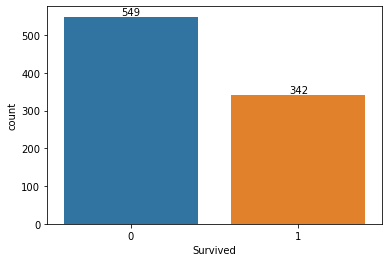

In [103]:
ax = sns.countplot(df['Survived'],data=df)
for container in ax.containers:
    ax.bar_label(container)

In [104]:
# Data is little imbalance

In [105]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [106]:
X =df[['Pclass','Gender','Age','SibSp', 'Parch','Fare','Embarked']]
y =df['Survived']

In [107]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Gender    891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [108]:
# Pclass and Fare are complete data

In [109]:
X['Embarked'].fillna(X['Embarked'].mode,inplace = True)

In [110]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Gender    891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


# Handling Genger column Categorical Data

In [111]:
gender_encoded = pd.get_dummies(X['Gender'])
gender_encoded

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [112]:
# concat X, gender_encoded
X = pd.concat([X,gender_encoded],axis = 1)

In [113]:
X.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,female,male
0,3,male,22.0,1,0,7.2500,S,0,1
1,1,female,38.0,1,0,71.2833,C,1,0
2,3,female,26.0,0,0,7.9250,S,1,0
3,1,female,35.0,1,0,53.1000,S,1,0
4,3,male,35.0,0,0,8.0500,S,0,1


In [114]:
X.drop('female',axis = 1,inplace = True)
X.drop('Gender',axis = 1,inplace = True)

In [115]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,3,22.0,1,0,7.2500,S,1
1,1,38.0,1,0,71.2833,C,0
2,3,26.0,0,0,7.9250,S,0
3,1,35.0,1,0,53.1000,S,0
4,3,35.0,0,0,8.0500,S,1


In [116]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   male      891 non-null    uint8  
dtypes: float64(2), int64(3), object(1), uint8(1)
memory usage: 42.8+ KB


In [117]:
embarked_encode = pd.get_dummies(X['Embarked'])

In [118]:
X = pd.concat([X,embarked_encode],axis = 1)

In [119]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,male,"<bound method Series.mode of 0 S\n1 C\n2 S\n3 S\n4 S\n ..\n886 S\n887 S\n888 S\n889 C\n890 Q\nName: Embarked, Length: 891, dtype: object>",C,Q,S
0,3,22.0,1,0,7.2500,S,1,0,0,0,1
1,1,38.0,1,0,71.2833,C,0,0,1,0,0
2,3,26.0,0,0,7.9250,S,0,0,0,0,1
3,1,35.0,1,0,53.1000,S,0,0,0,0,1
4,3,35.0,0,0,8.0500,S,1,0,0,0,1


In [120]:
X.drop('Embarked',axis = 1,inplace = True)
X.drop('Q',axis = 1,inplace = True)

In [121]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,"<bound method Series.mode of 0 S\n1 C\n2 S\n3 S\n4 S\n ..\n886 S\n887 S\n888 S\n889 C\n890 Q\nName: Embarked, Length: 891, dtype: object>",C,S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


In [122]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column                                                                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                                                                       --------------  -----  
 0   Pclass                                                                                                                                                                       891 non-null    int64  
 1   Age                                                                                                                                                                          891 non-null    float64
 2   SibSp                                                                              

# Step 5 : Building a machine learning Model

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y)

In [124]:
print("X_train.shape = ",X_train.shape)
print("X_test.shape = ",X_test.shape)
print("y1_train.shape = ",y_train.shape)
print("y1_test.shape = ",y_test.shape)

X_train.shape =  (623, 9)
X_test.shape =  (268, 9)
y1_train.shape =  (623,)
y1_test.shape =  (268,)


In [125]:
# Building a NB Model
# Model Creation
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
print("Model Created :- ",model)

Model Created :-  GaussianNB()


In [126]:
# Model Training
model.fit(X_train,y_train)
print("Model Train Successfully")

Model Train Successfully


In [127]:
# predict the result for Test Data(X_test)
y_pred = model.predict(X_test)

In [128]:
# cration model accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_pred,y_test)
print(" Accuracy :- ",round((acc*100),2))

 Accuracy :-  66.42
